In [3]:

import matplotlib.pyplot as plt## creating various types of plots and charts.
from matplotlib.patches import Circle## provides various shapes, such as rectangles, circles, polygons, etc., that can be used to annotate plots or add custom shapes to visualizations.
from matplotlib.patches import Rectangle ##is used to create rectangles or squares on plots
from mtcnn.mtcnn import MTCNN##MTCNN is a class that represents the Multi-Task Cascaded Convolutional Networks, a deep learning-based face detection algorithm.

In [22]:
# face detection with mtcnn on a photograph

# load image from file
filename = filename = "C:/Users/HP/Desktop/droopy/a-6-246x300.jpg"


pixels = plt.imread(filename)## It loads the image as an array of pixels, which can be used for further processing.

# create the detector, using default weights
detector = MTCNN()## This line creates an instance of the MTCNN class (basically object for the MTCNN class)

# detect faces in the image
faces = detector.detect_faces(pixels)## It takes the image pixels (previously loaded) as input and returns a list of face detections.
for face in faces:##this detects the faces in the image 
    print('\n')##this is used to seperate the info for each of the images
    print(face)(x, y, width, height)## facial landmarks, and the confidence score of the face detection.

1/1 [==============================] - 0s 121ms/step


{'box': [30, 46, 172, 223], 'confidence': 0.9980954527854919, 'keypoints': {'left_eye': (78, 131), 'right_eye': (160, 132), 'nose': (120, 181), 'mouth_left': (81, 206), 'mouth_right': (161, 209)}}


NameError: name 'x' is not defined

In [23]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):##this takes two arguments first is file path and second which is a list containing the information about the detected objects
    # load the image
    data = plt.imread(filename)##this will read the image
    # plot the image
    plt.imshow(data)##The image is loaded as an array of pixels.
    # get the context for drawing boxes
    ax = plt.gca()##This line gets the current Axes object from the plot. The Axes object is used to add various elements (e.g., rectangles, circles) to the plot.
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']##from the result the box contains the all the info abt the dimensions which gets seperated in (x,y,width, height)
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')##this will create a rectangle around the object
        # draw the box
        ax.add_patch(rect)##this will draw it
    # show the plot
    plt.show()

1/1 [==============================] - 0s 152ms/step


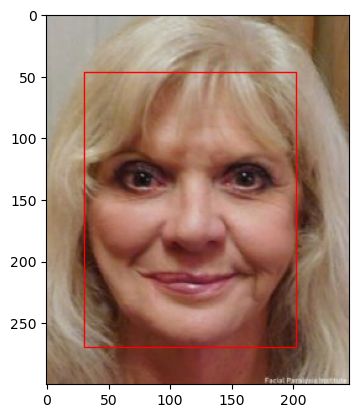

In [24]:
filename = filename = "C:/Users/HP/Desktop/droopy/a-6-246x300.jpg"

# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

In [4]:
# draw an image with detected objects
def draw_image_with_boxes_and_features(filename, result_list):
    # load the image
    data = plt.imread(filename)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']##tuple unpacking
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():## This line starts another loop to iterate over the facial keypoints detected for the current face.
            # create and draw dot
            dot = Circle(value, radius=2, color='red')##here we have passed the value and the accordingly it will create the dot on the faces
            ax.add_patch(dot)##it will add the dots on the face
    # show the plot
    plt.show()


1/1 [==============================] - 0s 153ms/step


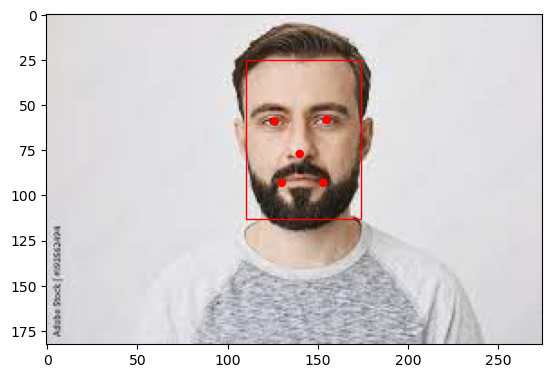

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

def draw_image_with_boxes_and_features(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
        
        # Get keypoints
        keypoints = result['keypoints']
        
        # Draw dots for the eyes, nose, mouth, and eyebrows
        draw_dot(ax, keypoints, 'left_eye')
        draw_dot(ax, keypoints, 'right_eye')
        draw_dot(ax, keypoints, 'nose')
        draw_dot(ax, keypoints, 'mouth')
        
        if 'left_eye' in keypoints and 'left_eyebrow_left' in keypoints:
            draw_dot(ax, keypoints, 'left_eyebrow_left')
        
        if 'right_eye' in keypoints and 'right_eyebrow_right' in keypoints:
            draw_dot(ax, keypoints, 'right_eyebrow_right')
        
        if 'mouth_left' in keypoints:
            draw_dot(ax, keypoints, 'mouth_left')
        
        if 'mouth_right' in keypoints:
            draw_dot(ax, keypoints, 'mouth_right')
    
    plt.show()

def draw_dot(ax, keypoints, keypoint_name):
    if keypoint_name in keypoints:
        dot = Circle(keypoints[keypoint_name], radius=2, color='red')
        ax.add_patch(dot)

filename = r"C:\Users\HP\Desktop\train1\WhatsApp Image 2023-07-26 at 10.43.49 PM.jpeg"
pixels = plt.imread(filename)
detector = MTCNN(min_face_size=20, steps_threshold=[0.5, 0.6, 0.7], scale_factor=0.709)
faces = detector.detect_faces(pixels)
draw_image_with_boxes_and_features(filename, faces)


In [12]:
import dlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def draw_image_with_landmarks(filename):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()

    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor('path_to_pretrained_shape_predictor.dat')

    dets = detector(data, 1)

    for d in dets:
        shape = predictor(data, d)

        for i in range(68):
            x, y = shape.part(i).x, shape.part(i).y
            dot = Circle((x, y), radius=2, color='red')
            ax.add_patch(dot)

    plt.show()

filename = "C:/Users/HP/Desktop/train1/WhatsApp Image 2023-07-26 at 10.43.49 PM.jpeg"
draw_image_with_landmarks(filename)


ModuleNotFoundError: No module named 'dlib'

1/1 [==============================] - 0s 166ms/step


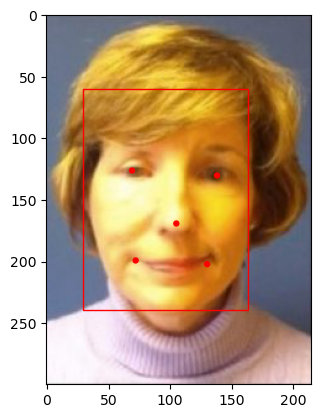

In [5]:

filename = r"C:\Users\HP\Desktop\train1\a-35-215x300.jpg"

# load image from file
pixels = plt.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes_and_features(filename, faces)

In [27]:
import matplotlib.pyplot as plt

# Load the image
filename = "C:/Users/HP/Desktop/droopy/a7.PNG"

pixels = plt.imread(filename)

# Check the shape of the image
print(pixels.shape)


(151, 137, 4)


In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

def draw_image_with_boxes_and_features(image_path, result_list):
    # load the image
    data = plt.imread(image_path)
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box and facial keypoints
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']  ## tuple unpacking
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    
    # Show the plot
    plt.show()

def save_data_to_text(result_list, image_files, text_filename):
    # Extract and store data in a DataFrame
    data_list = []
    for idx, result in enumerate(result_list):
        for key, value in result[0]['keypoints'].items():  # Access the keypoints for the first face (result[0])
            data_dict = {
                'Face_Index': idx + 1,
                'KeyPoint': key,
                'X': value[0],
                'Y': value[1]
            }
            data_list.append(data_dict)

    faces_data = pd.DataFrame(data_list)

    # Save the DataFrame to a text file
    faces_data.to_csv(text_filename, index=False, sep='\t')  # Use tab ('\t') as the separator


folder_path = "C:/Users/HP/Desktop/train"  # Folder containing the images

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# create the detector, using default weights
detector = MTCNN()

result_list = []
for image_file in image_files:
    # load image from file
    pixels = plt.imread(image_file)
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# save data to Excel file
text_filename = "C:\\Users\\HP\\Desktop\\face.txt"
save_data_to_text(result_list, image_files, text_filename)


1/1 [==============================] - 0s 41ms/step


C:\Users\HP\AppData\Local\Temp\ipykernel_9340\3857516849.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image_resized = image.resize(target_size, Image.ANTIALIAS)


1/1 [==============================] - 0s 148ms/step


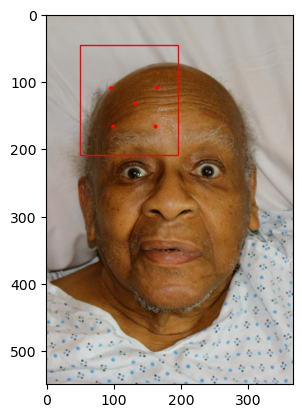

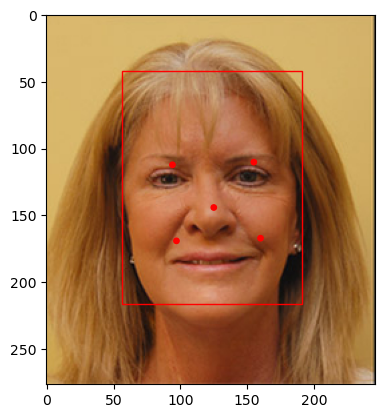

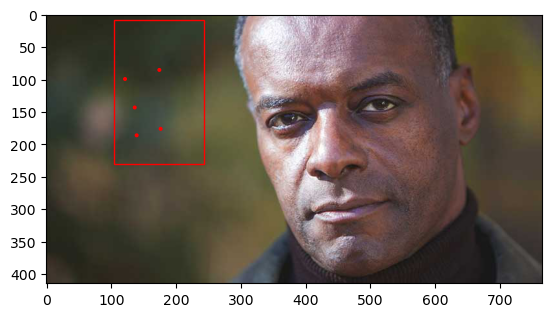

In [58]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

def resize_image(image_path, target_size=(256, 256)):
    image = Image.open(image_path)
    image_resized = image.resize(target_size, Image.ANTIALIAS)
    return image_resized

# Rest of the code remains the same...

folder_path = "C:/Users/HP/Desktop/train"  # Folder containing the images
target_image_size = (256, 256)  # Set the desired target image size

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

result_list = []
for image_file in image_files:
    # Load and resize the image
    resized_image = resize_image(image_file, target_size=target_image_size)

    # Convert the resized image to numpy array (required by MTCNN)
    pixels = np.array(resized_image)

    # Detect faces in the image using MTCNN
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# save data to Excel file
text_filename = "C:\\Users\\HP\\Desktop\\face.txt"
save_data_to_text(result_list, image_files, text_filename)

# Visualization (optional)
for i in range(len(image_files)):
    draw_image_with_boxes_and_features(image_files[i], result_list[i])


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle
from PIL import Image

def draw_image_with_boxes_and_features(image_path, result_list):
    # Load the image
    data = plt.imread(image_path)
    # Plot the image
    plt.imshow(data)
    # Get the context for drawing boxes
    ax = plt.gca()
    # Plot each box and facial keypoints
    for result in result_list:
        # Get coordinates
        x, y, width, height = result['box']  ## Tuple unpacking
        # Create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # Draw the box
        ax.add_patch(rect)
        # Draw the dots
        for key, value in result['keypoints'].items():
            # Create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    
    # Show the plot
    plt.show()

def save_data_to_text(result_list, image_files, text_filename):
    # Extract and store data in a DataFrame
    data_list = []
    for idx, result in enumerate(result_list):
        for key, value in result[0]['keypoints'].items():  # Access the keypoints for the first face (result[0])
            data_dict = {
                'Face_Index': idx + 1,
                'KeyPoint': key,
                'X': value[0],
                'Y': value[1]
            }
            data_list.append(data_dict)

    faces_data = pd.DataFrame(data_list)

    # Save the DataFrame to a text file
    faces_data.to_csv(text_filename, index=False, sep='\t')  # Use tab ('\t') as the separator

folder_path = "C:/Users/HP/Desktop/train"  # Folder containing the images

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

result_list = []
for image_file in image_files:
    # Load the image
    pixels = plt.imread(image_file)
    # Detect faces in the image using MTCNN
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# Save data to Excel file
text_filename = "C:\\Users\\HP\\Desktop\\face.txt"
save_data_to_text(result_list, image_files, text_filename)

# Visualization (optional)
for i in range(len(image_files)):
    draw_image_with_boxes_and_features(image_files[i], result_list[i])


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 131ms/step


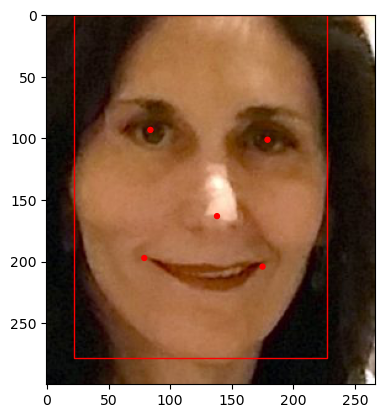

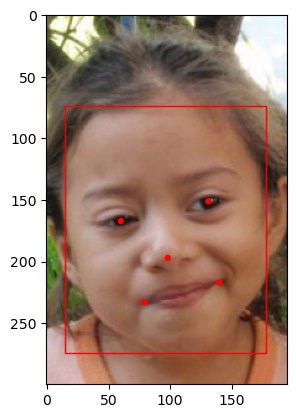

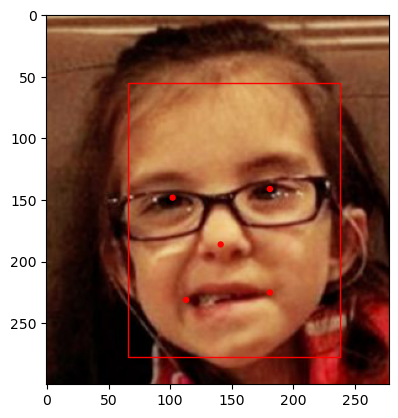

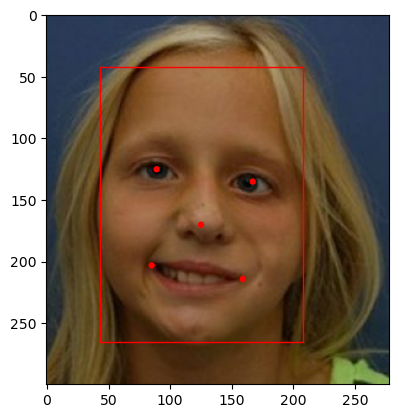

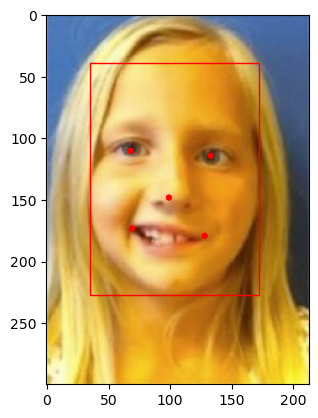

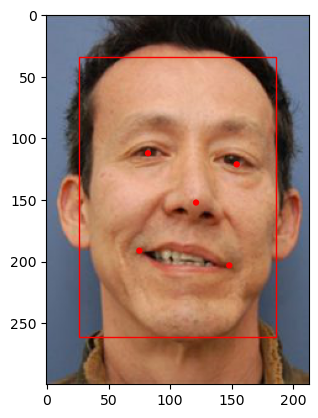

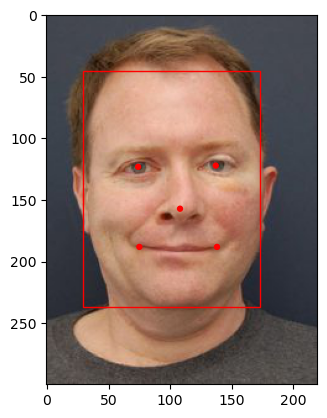

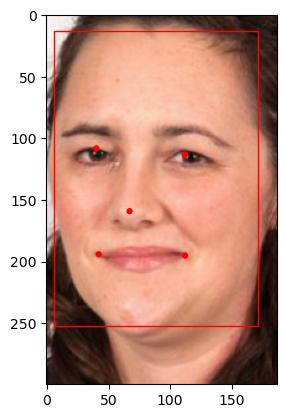

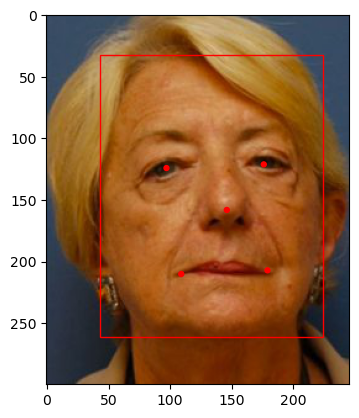

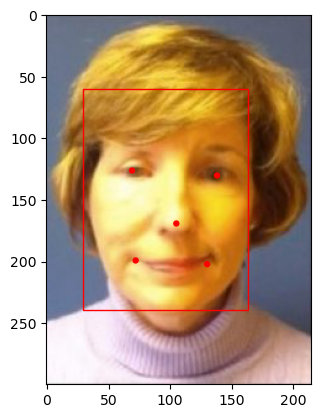

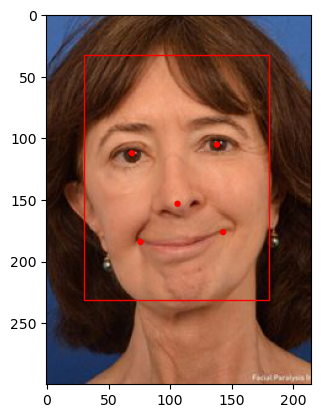

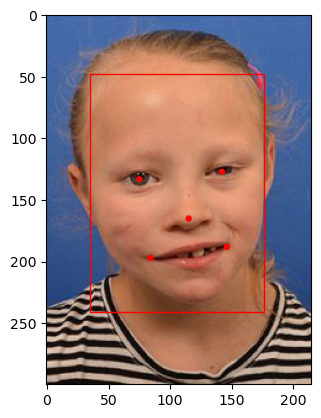

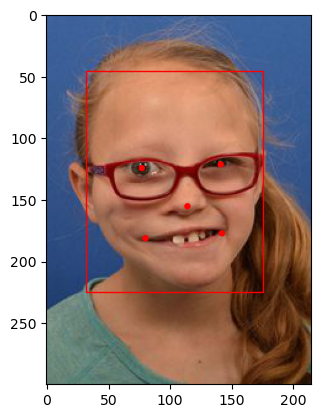

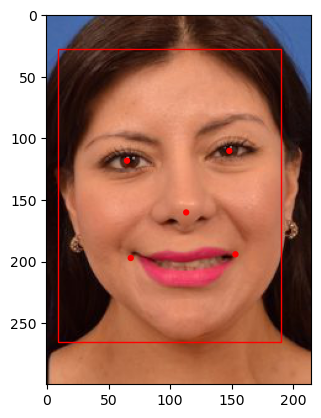

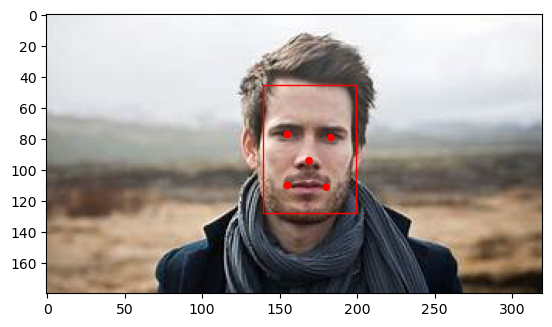

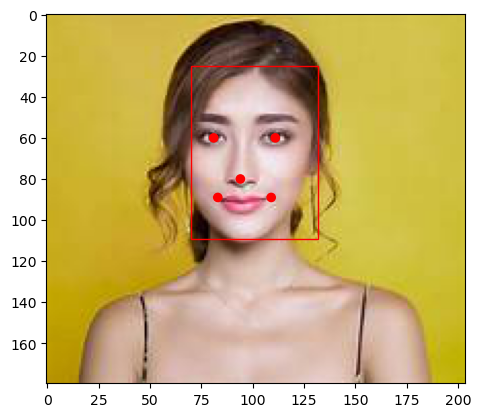

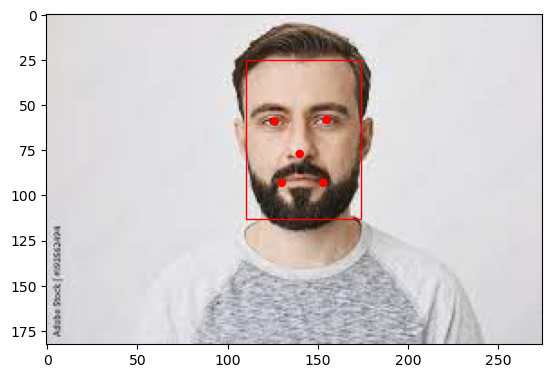

Distances for Face 1 in C:\Users\HP\Desktop\train1\a-24-267x300.jpg:
Left Eye Distance from Nose: 88.41
Right Eye Distance from Nose: 74.33
Mouth Left Distance from Nose: 68.10
Mouth Right Distance from Nose: 55.23

Distances for Face 1 in C:\Users\HP\Desktop\train1\a-25-195x300.jpg:
Left Eye Distance from Nose: 48.41
Right Eye Distance from Nose: 56.61
Mouth Left Distance from Nose: 40.71
Mouth Right Distance from Nose: 46.52

Distances for Face 1 in C:\Users\HP\Desktop\train1\a-26-278x300.jpg:
Left Eye Distance from Nose: 54.45
Right Eye Distance from Nose: 60.21
Mouth Left Distance from Nose: 53.00
Mouth Right Distance from Nose: 55.87

Distances for Face 1 in C:\Users\HP\Desktop\train1\a-27-278x300.jpg:
Left Eye Distance from Nose: 57.63
Right Eye Distance from Nose: 54.67
Mouth Left Distance from Nose: 51.86
Mouth Right Distance from Nose: 55.61

Distances for Face 1 in C:\Users\HP\Desktop\train1\a-28-213x300.jpg:
Left Eye Distance from Nose: 49.04
Right Eye Distance from Nose: 48

In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle
from PIL import Image
import math


def draw_image_with_boxes_and_features(image_path, result_list):
    # Load the image
    data = plt.imread(image_path)
    # Plot the image
    plt.imshow(data)
    # Get the context for drawing boxes
    ax = plt.gca()
    # Plot each box and facial keypoints
    for result in result_list:
        # Get coordinates
        x, y, width, height = result['box']  ## Tuple unpacking
        # Create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # Draw the box
        ax.add_patch(rect)
        # Draw the dots
        for key, value in result['keypoints'].items():
            # Create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    
    # Show the plot
    plt.show()

def save_data_to_text(result_list, image_files, text_filename):
    # Extract and store data in a DataFrame
    data_list = []
    for idx, result in enumerate(result_list):
        for key, value in result[0]['keypoints'].items():  # Access the keypoints for the first face (result[0])
            data_dict = {
                'Face_Index': idx + 1,
                'KeyPoint': key,
                'X': value[0],
                'Y': value[1]
            }
            data_list.append(data_dict)

    faces_data = pd.DataFrame(data_list)

    # Save the DataFrame to a text file
    faces_data.to_csv(text_filename, index=False, sep='\t')  # Use tab ('\t') as the separator

folder_path = "C:\\Users\\HP\\Desktop\\train1"  # Folder containing the images

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

result_list = []
for image_file in image_files:
    # Load the image
    pixels = plt.imread(image_file)
    # Detect faces in the image using MTCNN
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# Save data to Excel file
text_filename = "C:\\Users\\HP\\Desktop\\face.txt"
save_data_to_text(result_list, image_files, text_filename)

# Visualization (optional)
for i in range(len(image_files)):
    draw_image_with_boxes_and_features(image_files[i], result_list[i])

    
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Calculate and print distances for each image
for i in range(len(image_files)):
    image_file = image_files[i]
    faces = result_list[i]

    for idx, result in enumerate(faces):
        nose = result['keypoints']['nose']
        left_eye = result['keypoints']['left_eye']
        right_eye = result['keypoints']['right_eye']
        mouth_left = result['keypoints']['mouth_left']
        mouth_right = result['keypoints']['mouth_right']

        # Calculate distances
        distance_left_eye = calculate_distance(nose, left_eye)
        distance_right_eye = calculate_distance(nose, right_eye)
        distance_mouth_left = calculate_distance(nose, mouth_left)
        distance_mouth_right = calculate_distance(nose, mouth_right)

        # Print distances
        print(f"Distances for Face {idx + 1} in {image_file}:")
        print(f"Left Eye Distance from Nose: {distance_left_eye:.2f}")
        print(f"Right Eye Distance from Nose: {distance_right_eye:.2f}")
        print(f"Mouth Left Distance from Nose: {distance_mouth_left:.2f}")
        print(f"Mouth Right Distance from Nose: {distance_mouth_right:.2f}")
        print()

C:\Users\HP\AppData\Local\Temp\ipykernel_1080\2190117532.py:14: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize(target_size, Image.ANTIALIAS)


1/1 [==============================] - 0s 119ms/step


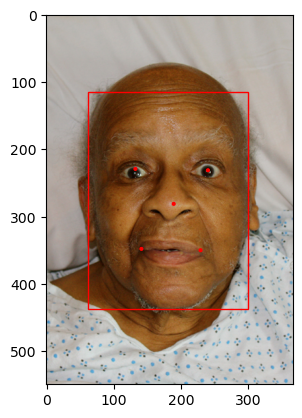

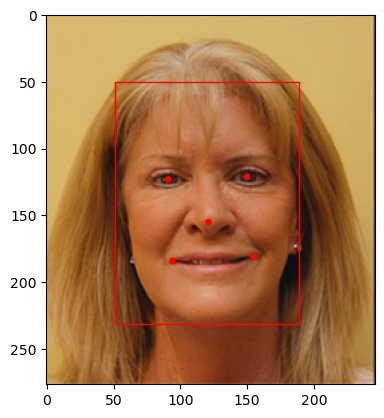

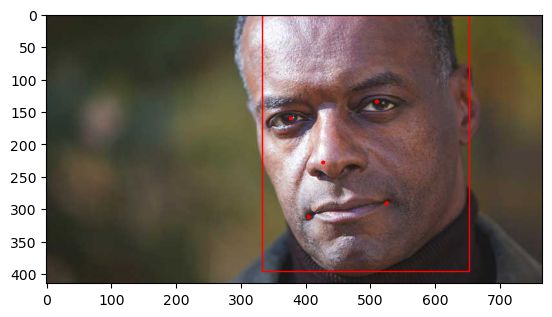

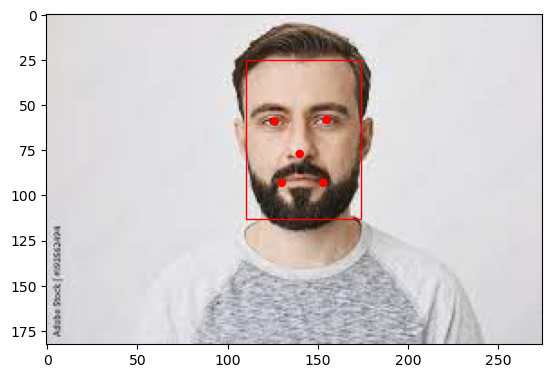

Distances for Face 1 in C:/Users/HP/Desktop/train\1405JEMSmul-Fig3b.jpg:
Left Eye Distance from Nose: 77.16
Right Eye Distance from Nose: 71.42
Mouth Left Distance from Nose: 82.42
Mouth Right Distance from Nose: 79.76

Distances for Face 1 in C:/Users/HP/Desktop/train\28_04.jpg:
Left Eye Distance from Nose: 43.86
Right Eye Distance from Nose: 44.69
Mouth Left Distance from Nose: 39.62
Mouth Right Distance from Nose: 42.80

Distances for Face 1 in C:/Users/HP/Desktop/train\766x415_Stroke_Symptoms.jpg:
Left Eye Distance from Nose: 84.40
Right Eye Distance from Nose: 125.40
Mouth Left Distance from Nose: 86.83
Mouth Right Distance from Nose: 116.50

Distances for Face 1 in C:/Users/HP/Desktop/train\WhatsApp Image 2023-07-26 at 5.05.12 PM.jpeg:
Left Eye Distance from Nose: 22.80
Right Eye Distance from Nose: 24.21
Mouth Left Distance from Nose: 18.87
Mouth Right Distance from Nose: 20.62



In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle
from PIL import Image
import math


def resize_image(image_path, target_size):
    # Open the image using PIL
    image = Image.open(image_path)
    # Resize the image
    image = image.resize(target_size, Image.ANTIALIAS)
    # Convert the image to RGB (if it's in grayscale)
    image = image.convert("RGB")
    return image


def draw_image_with_boxes_and_features(image_path, result_list):
    # Load the image
    data = plt.imread(image_path)
    # Plot the image
    plt.imshow(data)
    # Get the context for drawing boxes
    ax = plt.gca()
    # Plot each box and facial keypoints
    for result in result_list:
        # Get coordinates
        x, y, width, height = result['box']  ## Tuple unpacking
        # Create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # Draw the box
        ax.add_patch(rect)
        # Draw the dots
        for key, value in result['keypoints'].items():
            # Create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    
    # Show the plot
    plt.show()

def save_data_to_text(result_list, image_files, text_filename):
    # Extract and store data in a DataFrame
    data_list = []
    for idx, result in enumerate(result_list):
        for key, value in result[0]['keypoints'].items():  # Access the keypoints for the first face (result[0])
            data_dict = {
                'Face_Index': idx + 1,
                'KeyPoint': key,
                'X': value[0],
                'Y': value[1]
            }
            data_list.append(data_dict)

    faces_data = pd.DataFrame(data_list)

    # Save the DataFrame to a text file
    faces_data.to_csv(text_filename, index=False, sep='\t')  # Use tab ('\t') as the separator


folder_path = "C:/Users/HP/Desktop/train"  # Folder containing the images
target_size = (500, 500)  # Set the target size for resizing

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

result_list = []
for image_file in image_files:
    # Resize the image
    resized_image = resize_image(image_file, target_size)

    # Load the image
    #pixels = plt.imread(resized_image)
    # Detect faces in the image using MTCNN
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

result_list = []
for image_file in image_files:
    # Load the image
    pixels = plt.imread(image_file)
    # Detect faces in the image using MTCNN
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# Save data to Excel file
text_filename = "C:\\Users\\HP\\Desktop\\face.txt"
save_data_to_text(result_list, image_files, text_filename)

# Visualization (optional)
for i in range(len(image_files)):
    draw_image_with_boxes_and_features(image_files[i], result_list[i])

    
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Calculate and print distances for each image
for i in range(len(image_files)):
    image_file = image_files[i]
    faces = result_list[i]

    for idx, result in enumerate(faces):
        nose = result['keypoints']['nose']
        left_eye = result['keypoints']['left_eye']
        right_eye = result['keypoints']['right_eye']
        mouth_left = result['keypoints']['mouth_left']
        mouth_right = result['keypoints']['mouth_right']

        # Calculate distances
        distance_left_eye = calculate_distance(nose, left_eye)
        distance_right_eye = calculate_distance(nose, right_eye)
        distance_mouth_left = calculate_distance(nose, mouth_left)
        distance_mouth_right = calculate_distance(nose, mouth_right)

        # Print distances
        print(f"Distances for Face {idx + 1} in {image_file}:")
        print(f"Left Eye Distance from Nose: {distance_left_eye:.2f}")
        print(f"Right Eye Distance from Nose: {distance_right_eye:.2f}")
        print(f"Mouth Left Distance from Nose: {distance_mouth_left:.2f}")
        print(f"Mouth Right Distance from Nose: {distance_mouth_right:.2f}")
        print()


In [14]:
##this is the code which is giving distance from the nose to each part of the face

import os
import matplotlib.pyplot as plt
import pandas as pd
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle, Circle
from PIL import Image
import math


def resize_image(image_path, target_size):
    # Open the image using PIL
    image = Image.open(image_path)
    # Resize the image
    image = image.resize(target_size, Image.ANTIALIAS)
    # Convert the image to RGB (if it's in grayscale)
    image = image.convert("RGB")
    return image


def draw_image_with_boxes_and_features(image_path, result_list):
    # Load the image
    data = plt.imread(image_path)
    # Plot the image
    plt.imshow(data)
    # Get the context for drawing boxes
    ax = plt.gca()
    # Plot each box and facial keypoints
    for result in result_list:
        # Get coordinates
        x, y, width, height = result['box']  ## Tuple unpacking
        # Create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # Draw the box
        ax.add_patch(rect)
        # Draw the dots
        for key, value in result['keypoints'].items():
            # Create and draw dot
            dot = Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    
    # Show the plot
    plt.show()

def save_data_to_text(result_list, image_files, text_filename):
    # Extract and store data in a DataFrame
    data_list = []
    for idx, result in enumerate(result_list):
        for key, value in result[0]['keypoints'].items():  # Access the keypoints for the first face (result[0])
            data_dict = {
                'Face_Index': idx + 1,
                'KeyPoint': key,
                'X': value[0],
                'Y': value[1]
            }
            data_list.append(data_dict)

    faces_data = pd.DataFrame(data_list)

    # Save the DataFrame to a text file
    faces_data.to_csv(text_filename, index=False, sep='\t')  # Use tab ('\t') as the separator


folder_path = "C:/Users/HP/Desktop/train"  # Folder containing the images
target_size = (500, 500)  # Set the target size for resizing

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Get a list of all image files in the folder
image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

result_list = []
for image_file in image_files:
    # Load the image
    pixels = plt.imread(image_file)
    # Detect faces in the image using MTCNN
    detector = MTCNN()
    faces = detector.detect_faces(pixels)
    result_list.append(faces)

# Save data to Excel file
text_filename = "C:\\Users\\HP\\Desktop\\face.txt"
save_data_to_text(result_list, image_files, text_filename)

# Visualization (optional)
for i in range(len(image_files)):
    draw_image_with_boxes_and_features(image_files[i], result_list[i])

    
def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

# Calculate and print distances for each image
data_list = []  # Initialize the data_list outside the loop
for i in range(len(image_files)):
    image_file = image_files[i]
    faces = result_list[i]
    
    data_dict = {}  # Initialize the data_dict for each image
    for idx, result in enumerate(faces):
        nose = result['keypoints']['nose']
        left_eye = result['keypoints']['left_eye']
        right_eye = result['keypoints']['right_eye']
        mouth_left = result['keypoints']['mouth_left']
        mouth_right = result['keypoints']['mouth_right']

        # Calculate distances
        distance_left_eye = calculate_distance(nose, left_eye)
        distance_right_eye = calculate_distance(nose, right_eye)
        distance_mouth_left = calculate_distance(nose, mouth_left)
        distance_mouth_right = calculate_distance(nose, mouth_right)

        # Save distances in data_dict
        data_dict[f"Distance_Left_Eye_{idx+1}"] = distance_left_eye
        data_dict[f"Distance_Right_Eye_{idx+1}"] = distance_right_eye
        data_dict[f"Distance_Mouth_Left_{idx+1}"] = distance_mouth_left
        data_dict[f"Distance_Mouth_Right_{idx+1}"] = distance_mouth_right

    data_list.append(data_dict)  # Append data_dict to data_list for each image


    faces_data = pd.DataFrame(data_list)

    # Save the DataFrame to a text file
    faces_data.to_csv(text_filename, index=False, sep='\t')  # Use tab ('\t') as the separator

1/1 [==============================] - 0s 144ms/step


IndexError: list index out of range